<a href="https://colab.research.google.com/github/FilippMaksimov/Net.Statistics/blob/main/StatModRef02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

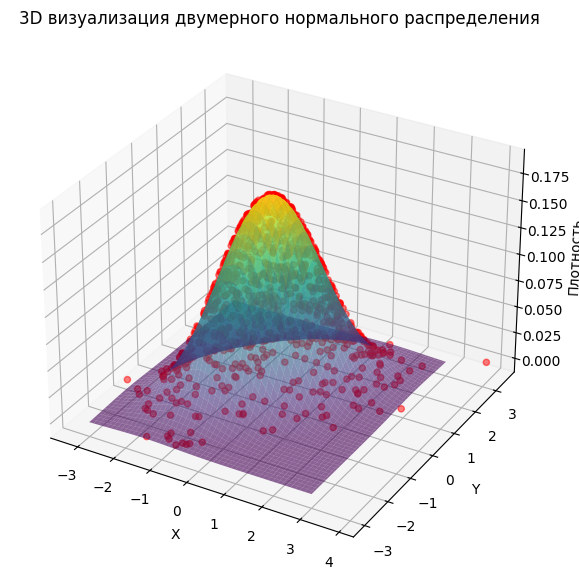

0.46609825699559093 0.43655684855684856


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Установка параметров
np.random.seed(42)
n_samples = 1000  # Количество наблюдений
true_correlation = 0.5  # Истинная корреляция

# Генерация данных X и Y
X = np.random.normal(0, 1, n_samples)
Y = true_correlation * X + np.random.normal(0, np.sqrt(1 - true_correlation ** 2), n_samples)

# Создание сетки для расчетов плотности
x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

# Расчет плотности двумерного нормального распределения
mean = [0, 0]
cov = [[1, true_correlation], [true_correlation, 1]]  # Ковариационная матрица
Z_grid = multivariate_normal(mean, cov).pdf(np.dstack((X_grid, Y_grid)))
Z_points = multivariate_normal(mean, cov).pdf(np.vstack([X, Y]).T)

# Визуализация 3D графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.6)
ax.scatter(X, Y, Z_points, color='r', marker='o', alpha=0.5)

# Настройки графика
ax.set_title("3D визуализация двумерного нормального распределения")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Плотность")

plt.show()
print(stats.pearsonr(X, Y)[0], stats.spearmanr(X, Y)[0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def error_type_ii_normal(num_samples, num_simulations, true_correlation = 0.5, alpha = 0.05):
  errors_pearson = 0
  errors_spearman = 0

  for _ in range(num_simulations):
    # Генерируем выборки из двумерного нормального распределения
    mu = [0, 0]
    cov = [[1, true_correlation], [true_correlation, 1]]
    x, y = np.random.multivariate_normal(mu, cov, num_samples).T

    # Проверка нулевой гипотезы о нулевой корреляции
    pearson_corr, pearson_p = stats.pearsonr(x, y)
    spearman_corr, spearman_p = stats.spearmanr(x, y)

    if pearson_p > alpha:
      errors_pearson += 1
    if spearman_p > alpha:
      errors_spearman += 1

  return errors_pearson / num_simulations, errors_spearman / num_simulations

In [ ]:
num_samples = 100  # Размер выборки
num_simulations = 1000  # Количество симуляций

errors_type_ii = error_type_ii_normal(num_samples, num_simulations, 0.5)

print(f"Ошибка второго рода Пирсона: {errors_type_ii[0]}; мощность: {1 - errors_type_ii[0]}")
print(f"Ошибка второго рода Спирмена: {errors_type_ii[1]}, мощность: {1 - errors_type_ii[1]}")

Ошибка второго рода Пирсона: 0.0; мощность: 1.0
Ошибка второго рода Спирмена: 0.0, мощность: 1.0


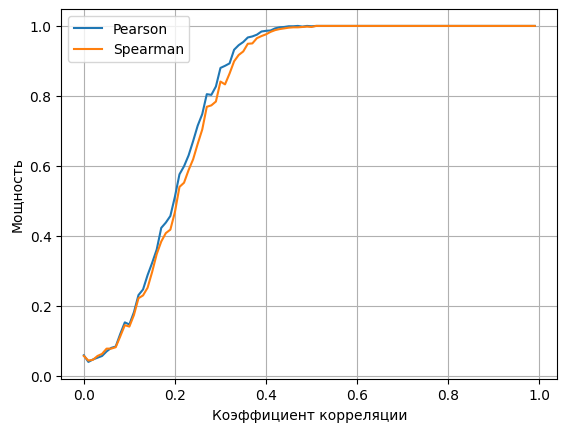

In [ ]:
np.random.seed(42)

num_samples = 100
num_simulations = 1000
powers_spearman = []
powers_pearson = []

for i in range(100):
  errors_type_ii = error_type_ii_normal(num_samples, num_simulations, true_correlation=i*0.01)
  power_pearson = 1 - errors_type_ii[0]
  power_spearman = 1 - errors_type_ii[1]
  powers_pearson.append(power_pearson)
  powers_spearman.append(power_spearman)

#Визуализация
plt.plot([i * 0.01 for i in range(100)], powers_pearson, label='Pearson')
plt.plot([i * 0.01 for i in range(100)], powers_spearman, label='Spearman')
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Мощность')
plt.grid()
plt.legend()

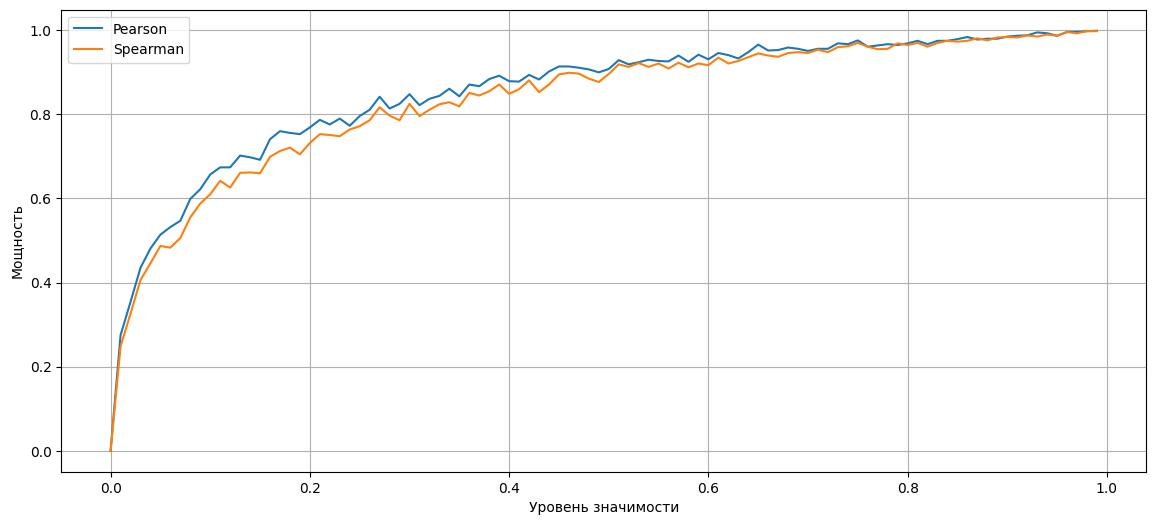

In [ ]:
np.random.seed(42)

num_samples = 100
num_simulations = 1000
powers_spearman = []
powers_pearson = []

for i in range(100):
  errors_type_ii = error_type_ii_normal(num_samples, num_simulations, true_correlation=0.2, alpha=i*0.01)
  power_pearson = 1 - errors_type_ii[0]
  power_spearman = 1 - errors_type_ii[1]
  powers_pearson.append(power_pearson)
  powers_spearman.append(power_spearman)

#Визуализация
plt.plot([i * 0.01 for i in range(100)], powers_pearson, label='Pearson')
plt.plot([i * 0.01 for i in range(100)], powers_spearman, label='Spearman')
plt.xlabel('Уровень значимости')
plt.ylabel('Мощность')
plt.grid()
plt.legend()

In [ ]:
# Пример данных
x = np.random.normal(0, 1, 100)
y = 0.5 * x + np.random.normal(0, 1, 100)  # Ненулевая корреляция

pearson_corr, pearson_p = stats.pearsonr(x, y)
spearman_corr, spearman_p = stats.spearmanr(x, y)
print(f"Коэффициент корреляции Пирсона: {pearson_corr}")
print(f"p-value Пирсона: {pearson_p}")

print(f"Коэффициент корреляции Спирмена: {spearman_corr}")
print(f"p-value Спирмена: {spearman_p}")

# Проверка значимости на уровне 0.05
if pearson_p <= 0.05:
  print("H0 отвергается. Корреляция Пирсона значима")
else:
  print("H0 не отвергается. Корреляция Пирсона не значима")

if spearman_p <= 0.05:
  print("Н0 отвергается. Корреляция Спирмена значима")
else:
  print("Н0 не отвергается. Корреляция Спирмена не значима")

Коэффициент корреляции Пирсона: 0.5210654005155713
p-value Пирсона: 2.7298325121426185e-08
Коэффициент корреляции Спирмена: 0.5427182718271826
p-value Спирмена: 5.443079756788608e-09
H0 отвергается. Корреляция Пирсона значима
Н0 отвергается. Корреляция Спирмена значима


In [ ]:
def error_type_i_normal(num_samples, num_simulations, n):
  errors_pearson = 0
  errors_spearman = 0

  for _ in range(num_simulations):
    # Генерируем выборки из двумерного нормального распределения с нулевой корреляцией
    mu = [0, 0]
    cov = [[1, 0], [0, 1]]  # Corr = 0
    x, y = np.random.multivariate_normal(mu, cov, num_samples).T

    # Добавляем повторяющиеся значения для имитации зависимости
    if np.random.rand() < 0.5:  # 50% шанса на добавление повторений
      duplicates = np.random.choice(x, size=num_samples // n)  # n-% наблюдений дублируется
      x = np.concatenate((x, duplicates))
      y = np.concatenate((y, duplicates))

      # Проверка нулевой гипотезы о нулевой корреляции
      pearson_corr, pearson_p = stats.pearsonr(x, y)
      spearman_corr, spearman_p = stats.spearmanr(x, y)

      if pearson_p <= 0.05:
        errors_pearson += 1
      if spearman_p <= 0.05:
        errors_spearman += 1

  return errors_pearson / num_simulations, errors_spearman / num_simulations

In [ ]:
num_samples = 100
num_simulations = 1000

type_i_errors = error_type_i_normal(num_samples, num_simulations, 10)

print(f"Ошибка первого рода Пирсона: {type_i_errors[0]}")
print(f"Ошибка первого рода Спирмена: {type_i_errors[1]}")

Ошибка первого рода Пирсона: 0.071
Ошибка первого рода Спирмена: 0.065


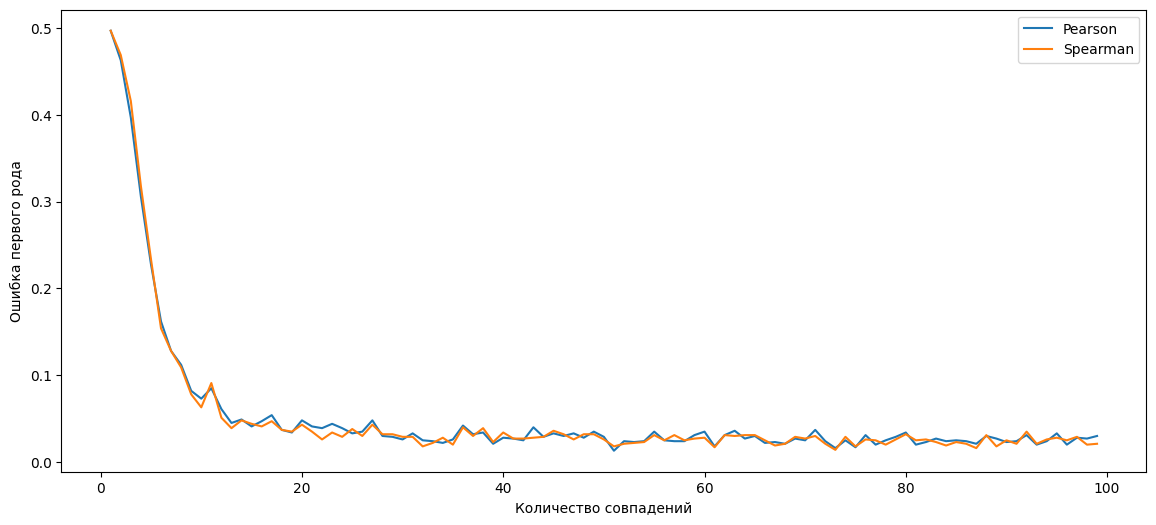

In [ ]:
errors_type_i_pearson = []
errors_type_i_spearman = []

for i in range(1,100):
  errors_type_i = error_type_i_normal(num_samples, num_simulations, i)
  errors_type_i_pearson.append(errors_type_i[0])
  errors_type_i_spearman.append(errors_type_i[1])

#Визуализация
plt.plot([i for i in range(1,100)], errors_type_i_pearson, label='Pearson')
plt.plot([i for i in range(1,100)], errors_type_i_spearman, label='Spearman')
plt.xlabel('Количество совпадений')
plt.ylabel('Ошибка первого рода')
plt.legend()

In [ ]:
def error_type_i_normal_dub(num_samples, num_simulations, true_correlation=0, alpha=0.05):
  errors_type_i_pearson = []
  errors_type_i_spearman = []
  mu = [0,0]
  cov = [[1, true_correlation], [true_correlation, 1]]
  k_list = [0.1, 1, 10]
  np.random.seed(42)

  for k in k_list:
    errors_pearson = 0
    errors_spearman = 0
    for i in range(num_simulations):
      data = np.random.multivariate_normal(mu, cov, num_samples)
      data_discretized = np.floor(data / k) * k
      pearson_corr, pearson_p = stats.pearsonr(data_discretized[:, 0], data_discretized[:, 1])
      spearman_corr, spearman_p = stats.spearmanr(data_discretized[:, 0], data_discretized[:, 1])

      if pearson_p <= alpha:
        errors_pearson += 1
      if spearman_p <= alpha:
        errors_spearman += 1

    errors_type_i_pearson.append(errors_pearson / num_simulations)
    errors_type_i_spearman.append(errors_spearman / num_simulations)
  return errors_type_i_pearson, errors_type_i_spearman

In [ ]:
res = error_type_i_normal_dub(num_samples=100, num_simulations=1000, true_correlation=0, alpha=0.05)
res

([0.0532,
  0.0533,
  0.0574,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.001,
  0.001,
  0.001,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.003,
  0.004,
  0.004,
  0.004,
  0.004,
  0.004,
  0.004,
  0.004,
  0.004,
  0.004,
  0.004,
  0.004,
  0.004,
  0.004,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.005,
  0.006,
  0.006,
  0.007,
  0.008,
  0.008,
  0.008,
  0.008,
  0.008,
  0.009,
  0.009,
  0.009,
  0.009,
  0.01,
  0.01,
  0.01,
  0.01,
  0.011,
  0.011,
  0.011,
  0.011,
  0.011,
  0.011,
  0.011

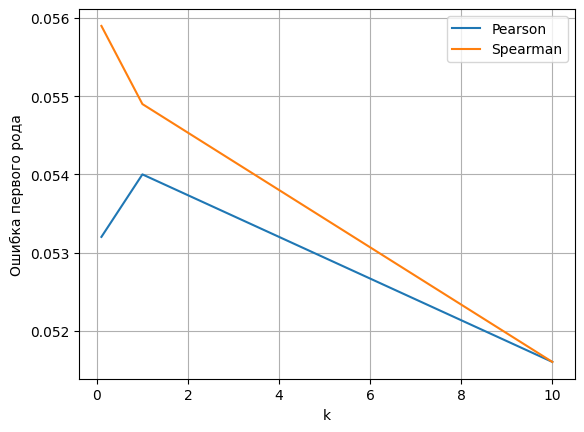

In [ ]:
d = error_type_i_normal_dub(num_samples=100, num_simulations=10000, true_correlation=0, alpha=0.05)
errors_type_i_pearson = d[0]
errors_type_i_spearman = d[1]
k_list = [0.1, 1, 10]

plt.plot([i for i in k_list], errors_type_i_pearson, label='Pearson')
plt.plot([i for i in k_list], errors_type_i_spearman, label='Spearman')
plt.xlabel('k')
plt.ylabel('Ошибка первого рода')
plt.grid()
plt.legend()

In [ ]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('Global YouTube Statistics.csv', encoding='windows-1252')
df.dropna(inplace=True)
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
11,12,WWE,96000000,7.742847e+10,Sports,WWE,70127,United States,US,Sports,...,600000.0,2007.0,May,11.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
13,14,BLACKPINK,89800000,3.214460e+10,People & Blogs,BLACKPINK,543,South Korea,KR,Music,...,700000.0,2016.0,Jun,29.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
plt.scatter()

In [ ]:
def corr_analyze(column1, column2, alpha = 0.05):
  pearson_corr, pearson_p = stats.pearsonr(column1, column2)
  spearman_corr, spearman_p = stats.spearmanr(column1, column2)
  print(f"Pearson corr: {pearson_corr}")
  print(f"p-value: {pearson_p}")

  if pearson_p <= alpha:
    print("Pearson correlation is significant")
  else:
    print("Pearson correlation is not significant")

  print(f"-------------------------------------------------")
  print(f"Spearman corr: {spearman_corr}")
  print(f"p-value: {spearman_p}")

  if spearman_p <= alpha:
    print("Spearman correlation is significant")
  else:
    print("Spearman correlation is not significant")

Text(0, 0.5, 'video views')

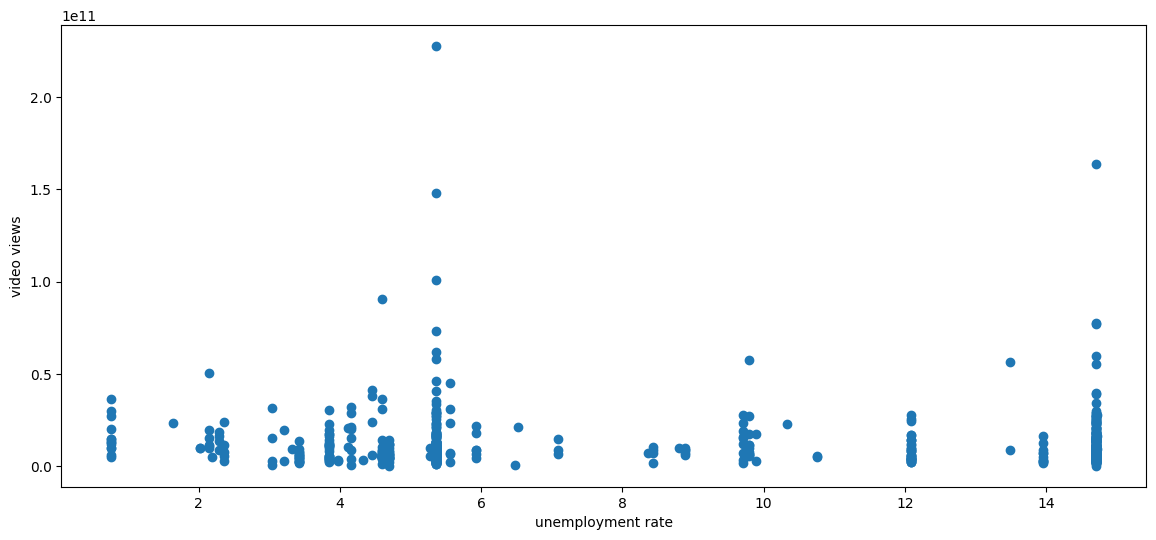

In [ ]:
plt.scatter(df['Unemployment rate'], df['video views'])
plt.xlabel('unemployment rate')
plt.ylabel('video views')

In [ ]:
corr_analyze(df['Unemployment rate'], df['video views'])

Pearson corr: -0.010848449187647439
p-value: 0.7988984816845707
Pearson correlation is not significant
-------------------------------------------------
Spearman corr: 0.034784239130172395
p-value: 0.41385881246347134
Spearman correlation is not significant


Text(0, 0.5, 'video views')

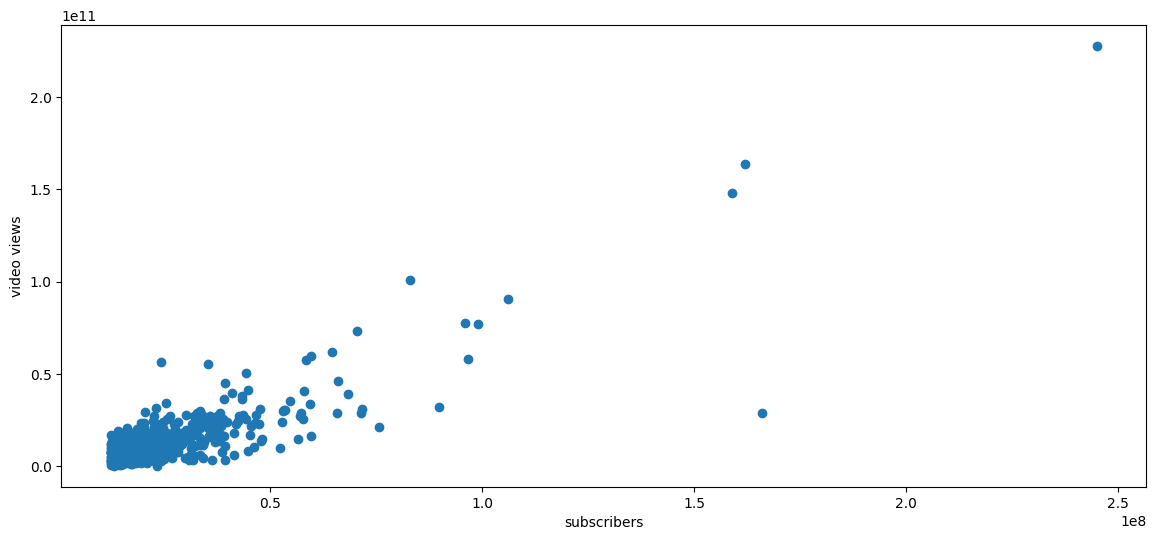

In [ ]:
plt.scatter(df['subscribers'], df['video views'])
plt.xlabel('subscribers')
plt.ylabel('video views')

In [ ]:
corr_analyze(df['subscribers'], df['video views'])

Pearson corr: 0.8507762135978202
p-value: 2.342298195688069e-156
Pearson correlation is significant
-------------------------------------------------
Spearman corr: 0.6125435698683203
p-value: 2.317481790014242e-58
Spearman correlation is significant


In [ ]:
np.random.seed(42)

def p_func(num_simulations,num_samples, true_correlation):
  p_values_pearson = []
  p_values_spearman = []
  for i in range(num_simulations):
    mu = [0, 0]
    cov = [[1, true_correlation], [true_correlation, 1]]  # Corr = 0 / not 0
    x, y = np.random.multivariate_normal(mu, cov, num_samples).T

    pearson_corr, pearson_p = stats.pearsonr(x, y)
    spearman_corr, spearman_p = stats.spearmanr(x, y)

    p_values_pearson.append(pearson_p)
    p_values_spearman.append(spearman_p)

  p_values_pearson.sort()
  p_values_spearman.sort()

  return p_values_pearson, p_values_spearman

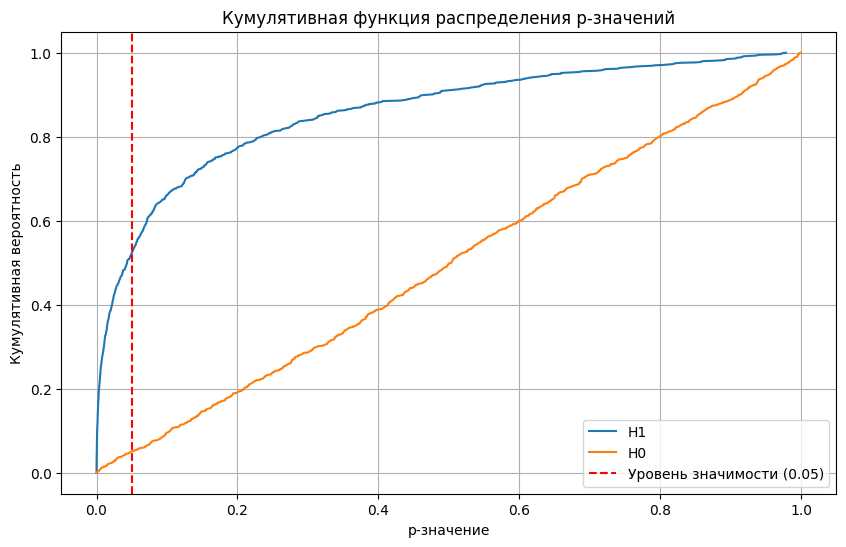

In [ ]:
np.random.seed(42)

alpha = 0.05
var = p_func(1000, 100, 0.2)
var2 = p_func(1000, 100, 0)

# Сортируем p-значения
p_values_h1 = np.sort(var[0])
p_values_h0 = np.sort(var2[0])

# Вычисляем кумулятивные вероятности
cdf1 = np.arange(1, len(p_values_h1) + 1) / len(p_values_h1)
cdf2 = np.arange(1, len(p_values_h0) + 1) / len(p_values_h0)

# Построение CDF
plt.figure(figsize=(10, 6))
plt.plot(p_values_h1, cdf1, label='H1')
plt.plot(p_values_h0, cdf2, label='H0')
plt.title('Кумулятивная функция распределения p-значений')
plt.xlabel('p-значение')
plt.ylabel('Кумулятивная вероятность')
plt.axvline(x=0.05, color='red', linestyle='--', label='Уровень значимости (0.05)')
plt.legend()
plt.grid()
plt.show()

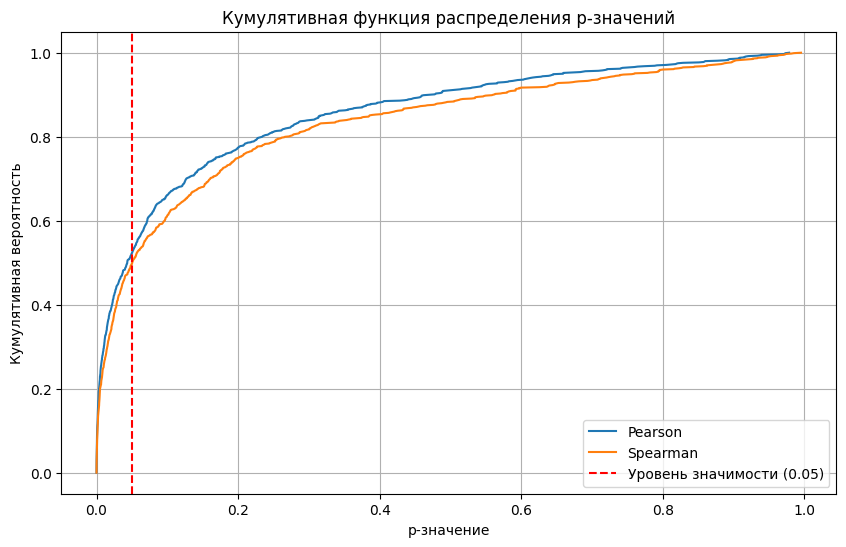

In [ ]:
np.random.seed(42)

# Сортируем p-значения
p_values_pearson_sorted = np.sort(var[0])
p_values_spearman_sorted = np.sort(var[1])

# Вычисляем кумулятивные вероятности
cdf1 = np.arange(1, len(p_values_pearson_sorted) + 1) / len(p_values_pearson_sorted)
cdf2 = np.arange(1, len(p_values_spearman_sorted) + 1) / len(p_values_spearman_sorted)

# Построение CDF
plt.figure(figsize=(10, 6))
plt.plot(p_values_pearson_sorted, cdf1, label='Pearson')
plt.plot(p_values_spearman_sorted, cdf2, label='Spearman')
plt.title('Кумулятивная функция распределения p-значений')
plt.xlabel('p-значение')
plt.ylabel('Кумулятивная вероятность')
plt.axvline(x=0.05, color='red', linestyle='--', label='Уровень значимости (0.05)')
plt.legend()
plt.grid()
plt.show()